<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#docs" data-toc-modified-id="docs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>docs</a></span><ul class="toc-item"><li><span><a href="#Q1:are-they-are-get-wrong-samingly???" data-toc-modified-id="Q1:are-they-are-get-wrong-samingly???-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Q1:are they are get wrong samingly???</a></span></li><li><span><a href="#aha" data-toc-modified-id="aha-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>aha</a></span></li></ul></li><li><span><a href="#sv" data-toc-modified-id="sv-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>sv</a></span></li><li><span><a href="#vr" data-toc-modified-id="vr-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>vr</a></span></li><li><span><a href="#ka" data-toc-modified-id="ka-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ka</a></span></li><li><span><a href="#mig" data-toc-modified-id="mig-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>mig</a></span><ul class="toc-item"><li><span><a href="#one-time" data-toc-modified-id="one-time-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>one time</a></span></li><li><span><a href="#many-times" data-toc-modified-id="many-times-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>many times</a></span></li></ul></li><li><span><a href="#draw" data-toc-modified-id="draw-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>draw</a></span></li><li><span><a href="#many-time-no-hot-with-mig" data-toc-modified-id="many-time-no-hot-with-mig-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>many time no hot with mig</a></span></li><li><span><a href="#Dalm" data-toc-modified-id="Dalm-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dalm</a></span></li></ul></div>

## docs

### Q1:are they are get wrong samingly???
try the wrong index mig has:
4971 real 58

mig  43 20 2d

svrg:
	min_index_now 0
	min_index_now 2
	min_index_now 7
	min_index_now 22
	min_index_now 43
	min_index_now 58
	('rand_index', 4971)
	('randwho and index_min', 58, 58) 
    
 vrsgd：
 
 ### aha
    

## sv

In [1]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
            print('min_index_now',index_min)
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(use_normA,train_array)
[d,n] = A.shape


### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-5

### the learning rate 0.15/(the proxi-L constant)
alpha=compute_alpha(A,lamb)

### loops
iters_outer=20
iters_inner=2*d

### count the number bingo
right=0

xx_0=get_xx_0()

rand_index=4971 ##2383
#     print('rand_index',rand_index)
rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)

### initialize the two ws
w_prev=np.array(np.zeros([n,1]))
w_tilda=np.array(np.zeros([n,1]))

### w_prev hotmap
# w_prev_hot=np.empty([n,1])
hot_num=0

### store the res and time
res_list=[]
time_list=[]
sci_list=[]
### count the time 
start = time.clock()
for i in range(iters_outer):
    print(i)
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)
        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### g_prev and tilda
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update the parameter
        w_prev=w_prev-alpha*(g_prev-g_tilda+mu)
        ### the soft thresholding
        temp=w_prev-lamb*alpha
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp
        
        ### compute the res of w_prev and store
#         res_now=sum((y-A.dot(w_prev))*(y-A.dot(w_prev)))
#         res_list.append(res_now)
#         time_list.append(time.clock()-start)
        
#         ### compute the sci value of w_prev and store
#         sci_now=compute_sci(xx_0,w_prev)
#         sci_list.append(sci_now)
        
        ### make the w_prev_hot
#         w_prev_hot=np.concatenate((w_prev_hot,w_prev),axis=1)
        
    ### assign the w_tilda for another loop    
    w_tilda=copy.deepcopy(w_prev)

index_min=get_index_min(xx_0,w_tilda)

        
print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1
    

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
min_index_now 0
min_index_now 2
min_index_now 7
min_index_now 22
min_index_now 43
min_index_now 58
('rand_index', 4971)
('randwho and index_min', 58, 58)


In [ ]:
for i in range(w_prev_hot):
    print(get_index_min(xx_0,w_prev_hot))

In [12]:
time_sv="npy/sv1"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_sv="npy/sv1"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sc_sv="npy/sv1"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'

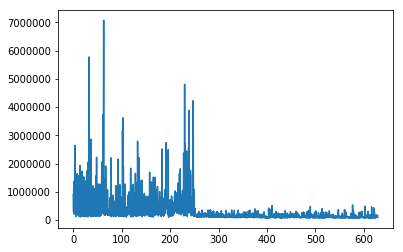

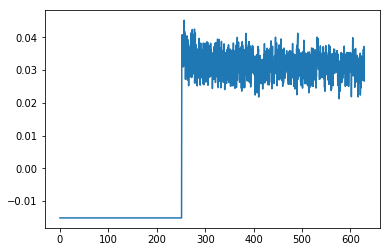

In [4]:
import matplotlib.pyplot as plt

plt.plot(time_list,res_list)
plt.show()
plt.plot(time_list,sci_list)
plt.show()

## vr

In [72]:
### import things
import pandas as pd
import copy 
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')

### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)

###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
            print('min_index_now',index_min)
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(use_normA,train_array)
[d,n] = A.shape


### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-5

### loops
iters_outer=20  # so many
iters_inner=2*d  # kd


### the learning rate 0.15/(the proxi-L constant+alpha)
alpha=compute_alpha(A,lamb)
### try bigger learning
# alpha=3*alpha

### make only part of the list to be none zero
xx_0=get_xx_0()


### count the number bingo when go through lots epochs
right=0


### choose a wrong one
rand_index=2341
#     print('rand_index',rand_index)
rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)

### initialize the two ws
w_prev=np.array(np.zeros([n,1]))
w_tilda=np.array(np.zeros([n,1]))
ww_prev=np.array(np.zeros([n,1]))

### w_prev hotmap
# w_prev_hot=np.empty([n,1])
hot_num=0
### big loop


### store the res and time
res_list=[]
time_list=[]
sci_list=[]
### count the time 
start = time.clock()
for i in range(iters_outer):
    ### the vrsgd things
    print(i)
    tau=max(2/(i+2),0.1818) 
    alpha2=alpha/tau
    alpha1=lamb*alpha2
    ### compute the full gradient
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)
        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### g_prev and tilda
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update the parameter
        w_prev=w_prev-alpha2*(g_prev-g_tilda+mu)
        ### the soft thresholding
        temp=w_prev-alpha1
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp
        
        ### compute the res of w_prev and store
#         res_now=sum((y-A.dot(w_prev))*(y-A.dot(w_prev)))
#         res_list.append(res_now)
#         time_list.append(time.clock()-start)
        
#         ### compute the sci value of w_prev and store
#         sci_now=compute_sci(xx_0,w_prev)
#         sci_list.append(sci_now)
        
        ### make the w_prev_hot
#         w_prev_hot=np.concatenate((w_prev_hot,w_prev),axis=1)
        ### sum of the previous w_prev as ww_prev
        ww_prev+=w_prev
        
    ### assign the w_tilda for another loop  3 kinds one or all or other
    w_tilda=compute_w_tilda(iters_inner,w_prev,ww_prev,'all')



index_min=get_index_min(xx_0,w_tilda)

print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1
    

time_list_name="npy/vrsgd"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_list_name="npy/vrsgd"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_list_name="npy/vrsgd"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
np.save(time_list_name,time_list)
np.save(res_list_name,res_list)
np.save(sci_list_name,sci_list)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
min_index_now 21
('rand_index', 2341)
('randwho and index_min', 27, 21)


In [13]:
time_vr="npy/vrsgd"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_vr="npy/vrsgd"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_vr="npy/vrsgd"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'


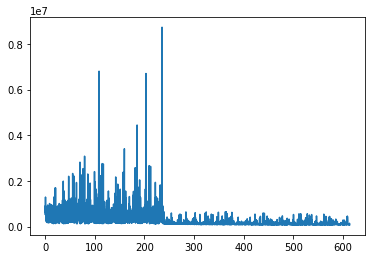

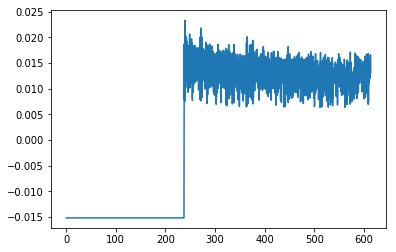

In [6]:
import matplotlib.pyplot as plt

plt.plot(time_list,res_list)
plt.show()
plt.plot(time_list,sci_list)
plt.show()

## ka

In [10]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time
### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')

### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
            print('min_index_now',index_min)
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(0,train_array)
[d,n] = A.shape

### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-4

### L-max
Lmax=(0.25*max(sum(A*A)))
Lmax=3*Lmax
### the learning rate 0.15/(the proxi-L constant)
# alpha=0.15/(0.25*max(sum(A*A)))

### tau1 
tau1=lamb/Lmax

### loops
iters_outer=20
iters_inner=d

### make only part of the list to be none zero
xx_0=get_xx_0()


### count the number bingo
right=0



rand_index=2383
rand_who=int(rand_index/85)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)

### initialize the two ws
w_tilda=np.array(np.zeros([n,1]))
x_prev=np.array(np.zeros([n,1]))
y_prev=np.array(np.zeros([n,1]))

### w_prev hotmap
# w_prev_hot=np.empty([n,1])
hot_num=0



### store the res and time
res_list=[]
time_list=[]
sci_list=[]
### big loop

### count the time 
start = time.clock()
for i in range(iters_outer):
    print(i)
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    tau=2/(i+4)
    tau=max(tau,0.1818)
    alpha=0.1/(tau*Lmax)
    tau2=lamb*alpha
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)

        ### updata w_prev
        w_prev=tau*x_prev+0.5*w_tilda+(0.5-tau)*y_prev

        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### g_prev and tilda
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update x_prev
        g_svrg=g_prev-g_tilda+mu
        x_prev=x_prev-alpha*(g_svrg)

        ### update the parameter
#             w_prev=w_prev-alpha*(g_prev-g_tilda+mu)
        ### the soft thresholding
        temp=w_prev-tau1
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp

        ### compute the res of w_prev and store
#         res_now=sum((y-A.dot(w_prev))*(y-A.dot(w_prev)))
#         res_list.append(res_now)
#         time_list.append(time.clock()-start)
        
#         ### compute the sci value of w_prev and store
#         sci_now=compute_sci(xx_0,w_prev)
#         sci_list.append(sci_now)
    
        ### make the w_prev_hot
#         w_prev_hot=np.concatenate((w_prev_hot,w_prev),axis=1)
        
         
        
    ### assign the w_tilda for another loop  2 versions  
    w_tilda=1*w_prev


index_min=get_index_min(xx_0,w_tilda)


print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1

time_list_name="npy/ka"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_list_name="npy/ka"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_list_name="npy/ka"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
np.save(time_list_name,time_list)
np.save(res_list_name,res_list)
np.save(sci_list_name,sci_list)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
min_index_now 0
min_index_now 1
min_index_now 10
min_index_now 24
min_index_now 28
min_index_now 45
('rand_index', 2383)
('randwho and index_min', 28, 45)


In [14]:
time_ka="npy/ka"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_ka="npy/ka"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_ka="npy/ka"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'

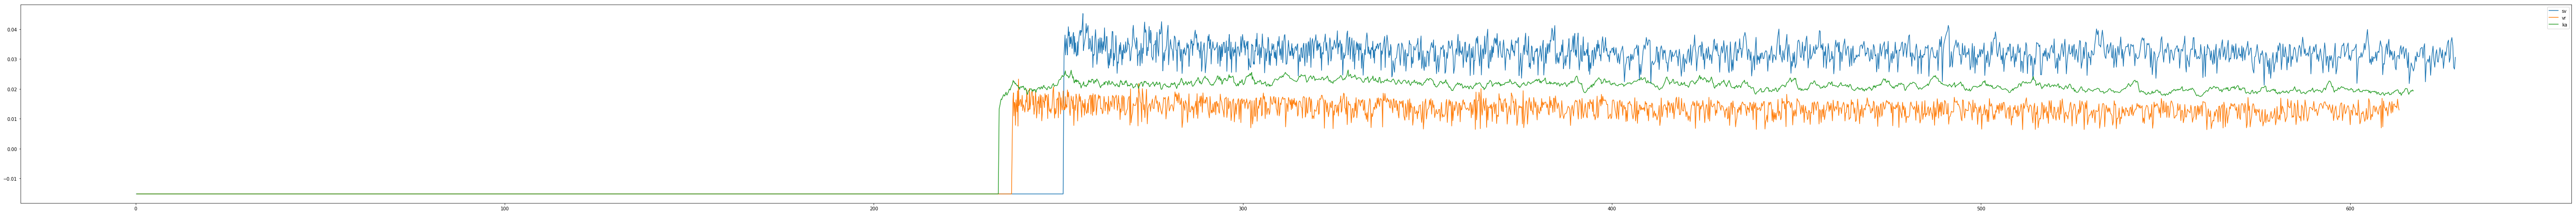

In [32]:
plt.figure(figsize=(100,8))

plt.plot(time_sv,sci_sv,label='sv')
plt.plot(time_vr,sci_vr,label='vr')
plt.plot(time_ka,sci_ka,label='ka')


plt.legend()

plt.show()


## mig

### one time

In [5]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
            print('min_index_now',index_min)
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(use_normA,train_array)
[d,n] = A.shape
L_max=0.25*max(sum(A*A))

### aha! same as the lambda, the L-1 norm coefficent
# lamb=1e-5
lamb=1e-5

### the learning rate 0.15/(the proxi-L constant)
alpha=compute_alpha(A,lamb)

### loops
iters_outer=20
iters_inner=6*d

### count the number bingo
right=0

xx_0=get_xx_0()

rand_index=4971
#     print('rand_index',rand_index)
rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)

### initialize the two ws
w_prev=np.array(np.zeros([n,1]))
w_tilda=np.array(np.zeros([n,1]))
ww_prev=np.array(np.zeros([n,1]))

### w_prev hotmap
# w_prev_hot=np.empty([n,1])
hot_num=0

### some hyper params


### store the res and time
res_list=[]
time_list=[]
sci_list=[]
min_list=[]

### count the time
start = time.clock()
for i in range(iters_outer):
    print(i)
    ### full grad
    mu=(-A.T).dot(y-A.dot(w_tilda))/d
    ### hyper params
    theta=2/(i+4)
    ita=1/(4*L_max*theta)
    ##small loop
    for j in range(iters_inner):
        ### choose a rand one from d 
        idx=np.random.randint(0,d)
        ### A transpose, need reshape
        A_idx=A[idx].T.reshape(n,1)
        ### compute y as the combine of w_prev and w_tilda
        y_w=theta*w_prev+(1-theta)*w_tilda
        ### g_prev and tilda
#         g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
        ### compute with y_w instead of w_prev
        g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(y_w)) 
        g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
        ### update the parameter
        w_prev=w_prev-ita*(g_prev-g_tilda+mu)
        ### the soft thresholding
        temp=w_prev-ita*lamb
        temp=(temp+abs(temp))/2
        w_prev=np.sign(w_prev)*temp
        ### sum w_prev
        ww_prev+=w_prev

        
        ### compute the res of w_prev and store
#         res_now=sum((y-A.dot(w_prev))*(y-A.dot(w_prev)))
#         res_list.append(res_now)
#         time_list.append(time.clock()-start)
        
#         ## compute the sci value of w_prev and store
#         sci_now=compute_sci(xx_0,w_prev)
#         sci_list.append(sci_now)
        
#         ## get 
#         index_min=get_index_min(xx_0,w_prev)
#         min_list.append(index_min)
        
        ### make the w_prev_hot
#         w_prev_hot=np.concatenate((w_prev_hot,w_prev),axis=1)
        
    ### assign the w_tilda for another loop    
#     w_tilda=copy.deepcopy(w_prev)
    ### mig combined w_tilda
    w_tilda=theta*(ww_prev/iters_inner)+(1-theta)*w_tilda

index_min=get_index_min(xx_0,w_tilda)

        
print(('rand_index',rand_index))
print(('randwho and index_min',rand_who,index_min))

if rand_who == index_min:
    right=right+1
    

# time_list_name="npy/mig"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
# res_list_name="npy/mig"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
# sci_list_name="npy/mig"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
# np.save(time_list_name,time_list)
# np.save(res_list_name,res_list)
# np.save(sci_list_name,sci_list)
    



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
min_index_now 0
min_index_now 12
min_index_now 17
min_index_now 19
min_index_now 22
min_index_now 43
('rand_index', 4971)
('randwho and index_min', 58, 43)


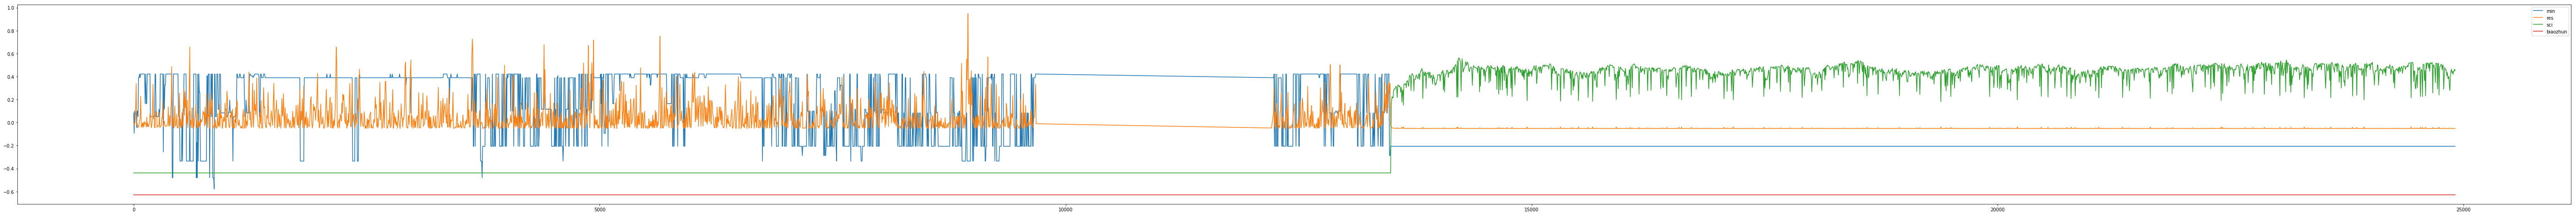

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,8))

def Normalize(data):
    m = np.mean(data)
    mx = max(data)
    mn = min(data)
    return [(float(i) - m) / (mx - mn) for i in data]


plt.plot(time_list,Normalize(min_list),label='min')
plt.plot(time_list,Normalize(res_list),label='res')
plt.plot(time_list,Normalize(sci_list),label='sci')
# -0.6290322580645161
biaozhun=np.zeros(np.shape(time_list))
for i in range(len(biaozhun)):
    biaozhun[i]=-0.6290322580645161
    
    
plt.plot(time_list,biaozhun,label='biaozhun')

plt.legend()

plt.show()

In [104]:
for i in range(len(min_list)):
    if min_list[i]==27:
        print(i)

654
655
658
673
674
675
676
677
688
689
690
692
693
694
696
697
705
706
707
708
709
711
712
716
717
719
734
743
746
754
755
756
768
769
770
771
772
773
774
775
778
779
780
781
784
787
815
816
817
818
819
820
821
823
825
826
830
831
832
834
835
838
839
840
842
847
854
855
866
872
874
875
876
884
890
891
892
896
930
944
1082
1083
1085
1092
1105
1107
1108
1267
1268
1283
1292
1293
1294
1295
1296
1304
1305
1309
1310
1311
1313
1323
1324
1325
1327
1328
1333
1334
1336
1337
1338
1339
1340
1341
1343
1344
1345
1346
1347
1348
1349
1350
1355
1358
1359
1360
1362
1366
1367
1368
1389
1391
1392
1393
1394
1395
1397
1398
1400
1402
1403
1404
1405
1409
1423
1424
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1443
1444
1445
1446
1449
1450
1453
1454
1455
1456
1457
1458
1459
1463
1464
1465
1466
1467
1475
1478
1479
1481
1484
1485
1486
1493
1494
1495
1497
1498
1535
1538
1539
1540
1541
1542
1543
1546
1547
1549
1553
1554
1555
1556
1558
1559
1560
1562
1563
1564
1565
1567
1571
1572
1574
1577
1580
1581
1582


In [108]:
for i in r

[45,
 34,
 46,
 45,
 45,
 45,
 37,
 46,
 46,
 43,
 64,
 64,
 66,
 64,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 50,
 66,
 50,
 50,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 66,
 66,
 43,
 43,
 43,
 43,
 43,
 43,
 47,
 43,
 47,
 66,
 66,
 66,
 66,
 66,
 66,
 24,
 66,
 47,
 60,
 60,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 10,
 10,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 66,
 43,
 43,
 43,
 19,
 19,
 19,
 19,
 43,
 19,
 47,
 47,
 66,
 66,
 66,
 66,
 66,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 46,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 66,
 66,
 66,
 66,
 66,
 66,
 10,
 29,
 10,
 66,
 19,
 66,
 56,
 56,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 65,
 65,
 43,
 66,
 66,
 66,
 10,
 43,
 43,
 66,
 66,
 43,
 66,
 10,
 10,
 10,
 4,
 66,
 66,
 43,
 43,
 43,
 66,
 66,
 66,
 47,
 47,
 47,
 66,
 66,
 66,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 47,
 47,
 47,
 43,
 43,
 43,
 45,
 45,
 47,
 52,
 45,
 

In [91]:
2341/85

27.541176470588237

### many times

In [78]:
### import things
import pandas as pd
import copy
import seaborn as sns
import time

### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

###############functions

### determin the x_tilda
def cp(x):
    return copy.deepcopy(x)

### get w_tilda
def compute_w_tilda(iters_inner,w_prev,ww_prev,all_or_one='mix',alpha=0.8,beta=0.2):
    if all_or_one=='all':
        w_tilda=cp(ww_prev)/iters_inner
    elif all_or_one=='one':
        w_tilda=cp(w_prev)
    elif all_or_one=='mix':
        w_tilda= cp(alpha*(w_prev)+beta*(ww_prev/iters_inner))
    return w_tilda

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A

### get alpha 
def compute_alpha(A,lamb):
    L_max=0.25*max(sum(A*A))
    alpha=0.15/(L_max+lamb)
    return alpha

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
            print('min_index_now',index_min)
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



###############functions


### process the A to be norm or not
A=get_A(use_normA,train_array)
[d,n] = A.shape
L_max=0.25*max(sum(A*A))

### aha! same as the lambda, the L-1 norm coefficent
# lamb=1e-5
lamb=1e-5

### the learning rate 0.15/(the proxi-L constant)
alpha=compute_alpha(A,lamb)

### loops
iters_outer=2
iters_inner=2*d

### count the number bingo
right=0

xx_0=get_xx_0()



for k in range(100):
    rand_index=np.random.randint(85*67)
#     print('rand_index',rand_index)
    rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

    #### which y version you use, norm processed or the plain one 
    if use_normy==1:
        temp_y = test_array[:,rand_index].reshape(d,1)
        y=np.empty(np.shape(temp_y))
        y=temp_y/np.linalg.norm(temp_y)
    else:
        y=test_array[:,rand_index].reshape(d,1)

    ### initialize the two ws
    w_prev=np.array(np.zeros([n,1]))
    w_tilda=np.array(np.zeros([n,1]))
    ww_prev=np.array(np.zeros([n,1]))

    for i in range(iters_outer):
        mu=(-A.T).dot(y-A.dot(w_tilda))/d
        theta=2/(i+4)
        ita=1/(4*L_max*theta)
        ##small loop
        for j in range(iters_inner):
            ### choose a rand one from d 
            idx=np.random.randint(0,d)
            ### A transpose, need reshape
            A_idx=A[idx].T.reshape(n,1)
            ### compute y as the combine of w_prev and w_tilda
            y_w=theta*w_prev+(1-theta)*w_tilda
            ### g_prev and tilda
    #         g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_prev)) 
            ### compute with y_w instead of w_prev
            g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(y_w)) 
            g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
            ### update the parameter
            w_prev=w_prev-ita*(g_prev-g_tilda+mu)
            ### the soft thresholding
            temp=w_prev-ita*lamb
            temp=(temp+abs(temp))/2
            w_prev=np.sign(w_prev)*temp
            ### sum w_prev
            ww_prev+=w_prev
        w_tilda=theta*(ww_prev/iters_inner)+(1-theta)*w_tilda
    print('***'*100)
    index_min=get_index_min(xx_0,w_tilda)
#     if rand_who != index_min:
    print('the pic',rand_index)
    print(('rand_index',rand_index))
    print(('randwho and index_min',rand_who,index_min))

    if rand_who == index_min:
        right=right+1
    

# time_list_name="npy/mig"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
# res_list_name="npy/mig"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
# sci_list_name="npy/mig"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
# np.save(time_list_name,time_list)
# np.save(res_list_name,res_list)
# np.save(sci_list_name,sci_list)
    



************************************************************************************************************************************************************************************************************************************************************************************************************
min_index_now 0
min_index_now 3
min_index_now 4
min_index_now 15
min_index_now 28
min_index_now 45
min_index_now 52
the pic 4465
('rand_index', 4465)
('randwho and index_min', 52, 52)
************************************************************************************************************************************************************************************************************************************************************************************************************
min_index_now 0
min_index_now 8
min_index_now 10
min_index_now 15
min_index_now 19
min_index_now 43
the pic 4971
('rand_index', 4971)
('randwho and index_min', 58, 43)
**********************************************

In [79]:
right

69

## draw

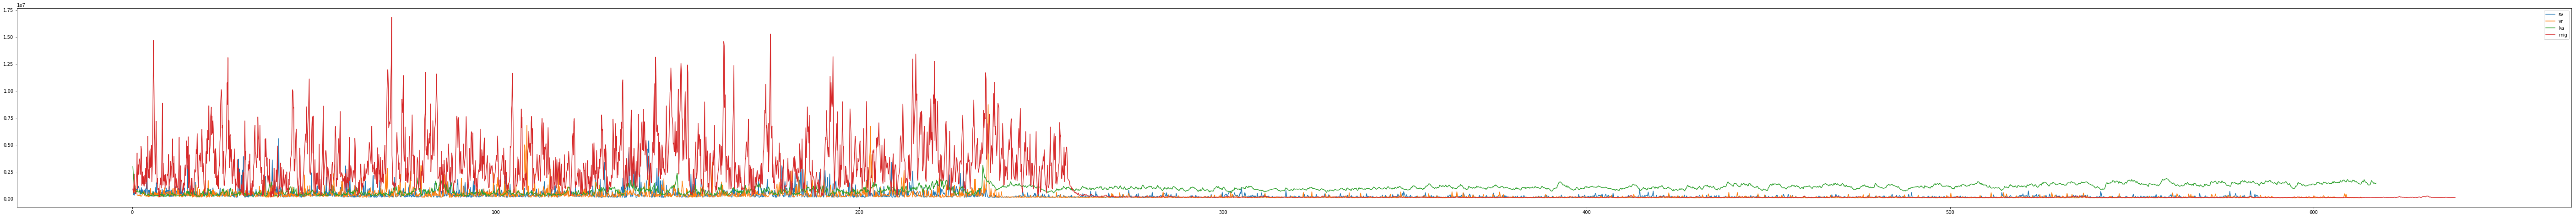

In [19]:
time_vr="npy/vrsgd"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_vr="npy/vrsgd"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_vr="npy/vrsgd"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'

time_ka="npy/ka"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_ka="npy/ka"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_ka="npy/ka"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'

time_sv="npy/sv1"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_sv="npy/sv1"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_sv="npy/sv1"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'

time_mig="npy/mig"+'time_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
res_mig="npy/mig"+'res_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'
sci_mig="npy/mig"+'sci_list'+'inner'+str(iters_inner)+'outer'+str(iters_outer)+'.npy'

import matplotlib.pyplot as plt
time_sv=np.load(time_sv)
time_vr=np.load(time_vr)
time_ka=np.load(time_ka)
time_mig=np.load(time_mig)

res_sv=np.load(res_sv)
res_vr=np.load(res_vr)
res_ka=np.load(res_ka)
res_mig=np.load(res_mig)

sci_sv=np.load(sci_sv)
sci_vr=np.load(sci_vr)
sci_ka=np.load(sci_ka)
sci_mig=np.load(sci_mig)

plt.figure(figsize=(100,8))
plt.plot(time_sv,res_sv,label='sv')
plt.plot(time_vr,res_vr,label='vr')
plt.plot(time_ka,res_ka,label='ka')
plt.plot(time_mig,res_mig,label='mig')


plt.legend()

plt.show()



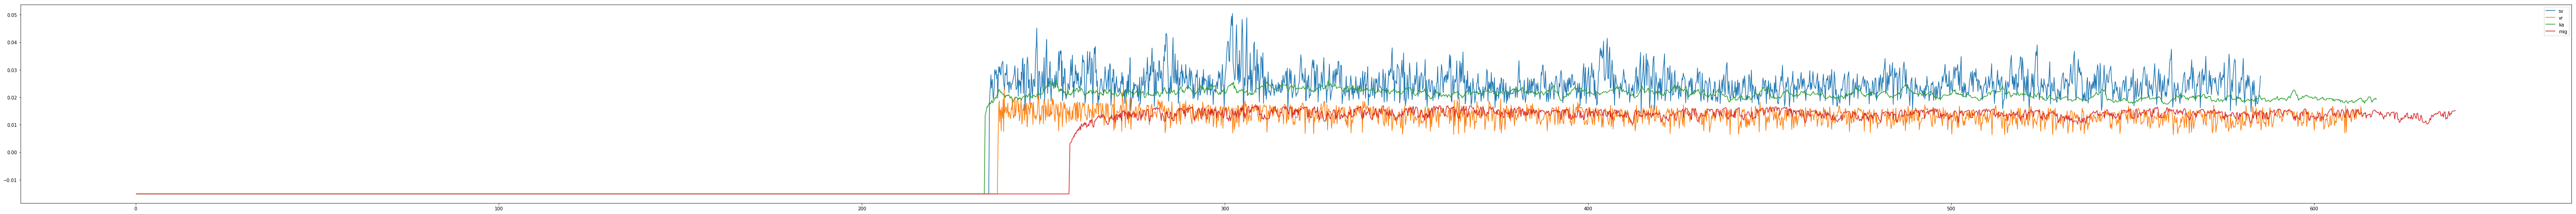

In [20]:
plt.figure(figsize=(100,8))
plt.plot(time_sv,sci_sv,label='sv')
plt.plot(time_vr,sci_vr,label='vr')
plt.plot(time_ka,sci_ka,label='ka')
plt.plot(time_mig,sci_mig,label='mig')


plt.legend()

plt.show()

In [16]:
a=[1,2,3]
b=1*a
b[2]=999
b

[1, 2, 999]

## many time no hot with mig

In [47]:
### import things
import pandas as pd
import copy
### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
###############hyper parameter
use_normA=0
use_normy=0
###############hyper parameter

### process the A to be norm or not
if use_normA==1: 
    A_before_norm = train_array
    A=np.empty(np.shape(A_before_norm))
    for i in range(np.shape(A_before_norm)[1]):
        temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
        A[:,i]=temp
else:
    A = train_array

### the A shape
[d,n] = A.shape


### aha! same as the lambda, the L-1 norm coefficent
lamb=1e-4

### the learning rate 0.15/(the proxi-L constant)
L_max=0.25*max(sum(A*A))
alpha=0.15/(0.25*max(sum(A*A)))

### loops
iters_outer=3
iters_inner=2*d

### count the number bingo
right=0

xx_0=np.zeros([85*67,67])
for i in range(67):
    xx_0[i*85:i*85+85][:,i]=1

for k in range(100):
    rand_index=np.random.randint(85*67)
#     print('rand_index',rand_index)
    rand_who=int(rand_index/85)
#     print('rand_who',rand_who)
    
    #### which y version you use, norm processed or the plain one 
    if use_normy==1:
        temp_y = test_array[:,rand_index].reshape(d,1)
        y=np.empty(np.shape(temp_y))
        y=temp_y/np.linalg.norm(temp_y)
    else:
        y=test_array[:,rand_index].reshape(d,1)
    
    ### initialize the two ws
    w_prev=np.array(np.zeros([n,1]))
    w_tilda=np.array(np.zeros([n,1]))
    ww_prev=np.array(np.zeros([n,1]))
    ### big loop
    for i in range(iters_outer):
        mu=(-A.T).dot(y-A.dot(w_tilda))/d
        theta=2/(i+4)
        ita=1/(4*L_max*theta)
        ##small loop
        for j in range(iters_inner):
            ### choose a rand one from d 
            idx=np.random.randint(0,d)
            ### A transpose, need reshape
            A_idx=A[idx].T.reshape(n,1)
            ### y_w
            y_w=theta*w_prev+(1-theta)*w_tilda
            ### g_prev and tilda
            g_prev=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(y_w)) 
            g_tilda=(-A_idx).dot(y[idx]-(A[idx].reshape(1,n)).dot(w_tilda)) 
            ### update the parameter
            w_prev=w_prev-alpha*(g_prev-g_tilda+mu)
            ### the soft thresholding
            temp=w_prev-lamb*alpha
            temp=(temp+abs(temp))/2
            w_prev=np.sign(w_prev)*temp
            ## sum the w_prev
            ww_prev=ww_prev+w_prev
        ### assign the w_tilda for another loop mig version
#         w_tilda=copy.deepcopy(w_prev)
        w_tilda=theta*(ww_prev/iters_inner)+(1-theta)*w_tilda



        
    res_min=1e9
    for i in range(np.shape(xx_0)[1]):
        temp=xx_0[:,i].reshape(5695,1)
        x_phi=w_tilda*temp
        res=sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
        if res<res_min:
            res_min=res
            index_min=i


    print('randwho and index_min',rand_who,index_min)
#     print('detect and rand_who',detect,rand_who)
#     print('rand_index',rand_index)
#     print('rand_who',rand_who)
#     print('*'*80)
#     if detect == rand_who:
#         right=right+1

    if rand_who == index_min:
        right=right+1


    
    
    

randwho and index_min 26 50
randwho and index_min 24 24
randwho and index_min 1 66
randwho and index_min 65 65
randwho and index_min 2 2
randwho and index_min 44 43
randwho and index_min 40 40
randwho and index_min 35 35
randwho and index_min 57 57
randwho and index_min 16 45
randwho and index_min 45 45
randwho and index_min 9 9
randwho and index_min 61 61
randwho and index_min 51 51
randwho and index_min 41 28
randwho and index_min 44 65
randwho and index_min 16 16
randwho and index_min 13 13
randwho and index_min 29 29
randwho and index_min 59 59
randwho and index_min 59 59
randwho and index_min 57 57
randwho and index_min 35 35
randwho and index_min 9 9
randwho and index_min 19 19
randwho and index_min 51 51
randwho and index_min 12 49
randwho and index_min 34 34
randwho and index_min 13 13
randwho and index_min 46 46
randwho and index_min 20 20


KeyboardInterrupt: 

## Dalm

In [44]:
import pandas as pd
import copy
import seaborn as sns
import time
from numpy.linalg import norm


def SolveDALM(A,b,xG):

    lammda = 0
    maxIter = 2
    
    m,n = A.shape
    At = A.transpose()
    
    beta = 0.1*norm(b,ord=1)/m
    betaInv = 1/beta
    
    G = np.dot(A,At)+np.eye(m)*lammda/beta
    invG = np.linalg.inv(G)
    
    nIter = 0
    
    y = np.zeros([m,1])
    x = np.zeros([n,1])
    
    converged_main = 0
    

    
    temp = np.dot(At,y)
    f = norm(x,ord =1)
    while not converged_main:
        
        nIter += 1
        
        x_old = x
        
        #update z
        temp1 = temp+np.dot(x,betaInv)
        z = np.sign(temp1)*np.min(np.hstack((abs(temp1), \
            np.ones(temp1.shape))),1).reshape(len(temp1),1)
        
        # compute A' * y
        y = np.dot(invG,np.dot(A,z-x*betaInv)+b*betaInv)
        temp = np.dot(At,y)
        
        #update x
        x = x-beta*(z-temp)
        

        if nIter < maxIter:
            converged_main = 1
            

    return x

### get the data matrix A
def get_A(use_normA,train_array):
    if use_normA==1: 
        A_before_norm = train_array
        A=np.empty(np.shape(A_before_norm))
        for i in range(np.shape(A_before_norm)[1]):
            temp=A_before_norm[:,i]/np.linalg.norm(A_before_norm[:,i])
            A[:,i]=temp
    else:
        A = train_array
    return A
        
def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))
    
def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min

def compute_sci(xx_0,w):
    w_l1=np.linalg.norm(w,ord=1)
    temp_max=1e-9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        x_phi_l1=np.linalg.norm(x_phi,ord=1)
        if x_phi_l1>temp_max:
            temp_max=x_phi_l1
    return (67*(temp_max/w_l1)-1)/(67-1)



### read form the csv doc
data_train = pd.read_csv('train.csv')  
data_test = pd.read_csv('test.csv')
### trans to array
train_array = np.array(data_train)
test_array = np.array(data_test)
### tune hyper params
use_normA=0
use_normy=0
### get A
A=get_A(0,train_array)
[d,n] = A.shape
### get y
rand_index=2383
#     print('rand_index',rand_index)
rand_who=int(rand_index/85)
#     print('rand_who',rand_who)

#### which y version you use, norm processed or the plain one 
if use_normy==1:
    temp_y = test_array[:,rand_index].reshape(d,1)
    y=np.empty(np.shape(temp_y))
    y=temp_y/np.linalg.norm(temp_y)
else:
    y=test_array[:,rand_index].reshape(d,1)


x = np.zeros([n,1])


x = SolveDALM(A,y,x)


In [45]:
lamb=0
def compute_res(y,x_phi,lamb):
    return sum((y-A.dot(x_phi))*(y-A.dot(x_phi)))

def get_xx_0():
    xx_0=np.zeros([85*67,67])
    for i in range(67):
        xx_0[i*85:i*85+85][:,i]=1
    return xx_0

def get_index_min(xx_0,w_tilda):
    res_min=1e9
    for m in range(np.shape(xx_0)[1]):
        temp=xx_0[:,m].reshape(5695,1)
        x_phi=w_tilda*temp
        res=compute_res(y,x_phi,lamb)
        if res<res_min:
            res_min=res
            index_min=m
    return index_min



In [46]:
xx_0=get_xx_0()
get_index_min(xx_0,x)

28